Population
Population: [ 9 12 15]
Population mean (μ) = 12.0000
Population variance (σ²) = 6.0000
Population standard deviation (σ) = 2.4495

Possible Samples (with replacement)
  Sample  Sample Mean
  (9, 9)          9.0
 (9, 12)         10.5
 (9, 15)         12.0
 (12, 9)         10.5
(12, 12)         12.0
(12, 15)         13.5
 (15, 9)         12.0
(15, 12)         13.5
(15, 15)         15.0

Sampling Distribution of Sample Means
 Sample Mean  Frequency  Probability
         9.0          1     0.111111
        10.5          2     0.222222
        12.0          3     0.333333
        13.5          2     0.222222
        15.0          1     0.111111

Sampling Distribution Statistics
Mean of sampling distribution= 12.0000
Variance of sampling distribution= 3.0000
Standard deviation= 1.7321

Verification:
σx̄² = 3.0000, and σ²/n = 3.0000


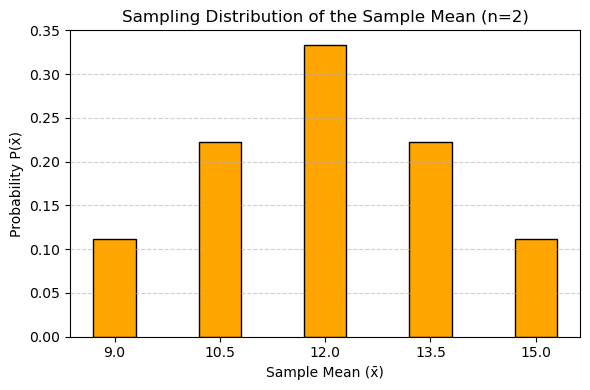

In [22]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

population = np.array([9, 12, 15])
n = 2 

mu = np.mean(population)
pop_var = np.var(population, ddof=0)
sample_var = np.sqrt(pop_var)

samples = list(itertools.product(population, repeat=n))
sample_means = np.array([np.mean(s) for s in samples])

df = pd.DataFrame({
    'Sample': samples,
    'Sample Mean': sample_means
})

freq = df['Sample Mean'].value_counts().sort_index()
prob = freq / len(samples)

mu_xbar = np.sum(prob.index * prob.values)
sigma2_xbar = np.sum((prob.index - mu_xbar)**2 * prob.values)
sigma_xbar = np.sqrt(sigma2_xbar)

print("Population")
print(f"Population: {population}")
print(f"Population mean (μ) = {mu:.4f}")
print(f"Population variance (σ²) = {pop_var:.4f}")
print(f"Population standard deviation (σ) = {sample_var:.4f}\n")

print("Possible Samples (with replacement)")
print(df.to_string(index=False))

print("\nSampling Distribution of Sample Means")
pmf_df = pd.DataFrame({
    'Sample Mean': prob.index,
    'Frequency': freq.values,
    'Probability': prob.values
}).reset_index(drop=True)
print(pmf_df.to_string(index=False))

print("\nSampling Distribution Statistics")
print(f"Mean of sampling distribution= {mu_xbar:.4f}")
print(f"Variance of sampling distribution= {sigma2_xbar:.4f}")
print(f"Standard deviation= {sigma_xbar:.4f}")

print("\nVerification:")
print(f"σx̄² = {sigma2_xbar:.4f}, and σ²/n = {pop_var/n:.4f}")

pmf_df = pmf_df.sort_values('Sample Mean')

plt.figure(figsize=(6,4))
plt.bar(pmf_df['Sample Mean'], pmf_df['Probability'], 
        width=0.6, align='center', color='orange', edgecolor='black')

plt.xticks(pmf_df['Sample Mean'])
plt.yticks(np.arange(0, max(pmf_df['Probability']) + 0.05, 0.05))

plt.xlabel('Sample Mean (x̄)')
plt.ylabel('Probability P(x̄)')
plt.title('Sampling Distribution of the Sample Mean (n=2)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [18]:
pop = np.array([3, 7, 11, 15])
n = 2

pop_mean = pop.mean()
pop_stdev = pop.std(ddof = 0)
pop_var = pop_stdev**2

samples = list(itertools.product(pop, repeat=n)) 
sample_means = np.array([np.mean(s) for s in samples])

df = pd.DataFrame({
    "Sample": samples,
    "Sample Mean": sample_means
})

freq = df["Sample Mean"].value_counts().sort_index()
prob = freq / len(samples)

sam_mean = sample_means.mean()

sam_stdev = sample_means.std(ddof=0)
sam_variance = sam_stdev**2

print("A. Population mean (μ) =", round(pop_mean, 4))
print("B. Population variance (σ²) =", round(pop_var, 4))
print("C. Mean of sampling distribution (μx̄) =", round(sam_mean, 4))
print("D. Variance of sampling distribution (σx̄²) =", round(sam_variance, 4))

print("\nVerification:")
print(f"σx̄² = {sam_variance:.4f}, and σ²/n = {pop_var/n:.4f}")

A. Population mean (μ) = 9.0
B. Population variance (σ²) = 20.0
C. Mean of sampling distribution (μx̄) = 9.0
D. Variance of sampling distribution (σx̄²) = 10.0

Verification:
σx̄² = 10.0000, and σ²/n = 10.0000


In [24]:
n = 200
p = 0.5
mu = n * p
sigma = math.sqrt(n * p * (1 - p))

p_a_normal = stats.norm.cdf((79.5 - mu) / sigma)  
p_a_exact = stats.binom.cdf(79, n, p)

p_b_normal = stats.norm.cdf((114.5 - mu) / sigma) - stats.norm.cdf((85.5 - mu) / sigma)
p_b_exact = stats.binom.cdf(114, n, p) - stats.binom.cdf(85, n, p)

p_c_normal = 1 - stats.norm.cdf((108.5 - mu) / sigma)
p_c_exact = 1 - stats.binom.cdf(108, n, p)

print(f"Population mean (μ) = {mu:.4f}")
print(f"Population standard deviation (σ) = {sigma:.4f}\n")

print("(a) P(X < 80)  = less than 40% boys")
print(f"   Normal approximation: {p_a_normal:.6f}")
print(f"   Exact binomial:       {p_a_exact:.6f}\n")

print("(b) P(86 ≤ X ≤ 114) = between 43% and 57% girls")
print(f"   Normal approximation: {p_b_normal:.6f}")
print(f"   Exact binomial:       {p_b_exact:.6f}\n")

print("(c) P(X > 108) = more than 54% boys")
print(f"   Normal approximation: {p_c_normal:.6f}")
print(f"   Exact binomial:       {p_c_exact:.6f}")

Population mean (μ) = 100.0000
Population standard deviation (σ) = 7.0711

(a) P(X < 80)  = less than 40% boys
   Normal approximation: 0.001871
   Exact binomial:       0.001817

(b) P(86 ≤ X ≤ 114) = between 43% and 57% girls
   Normal approximation: 0.959695
   Exact binomial:       0.959963

(c) P(X > 108) = more than 54% boys
   Normal approximation: 0.114666
   Exact binomial:       0.114623


In [25]:
x = np.array([6, 9, 12, 15, 18])
p = np.array([0.1, 0.2, 0.4, 0.2, 0.1])
n = 2

mu = np.dot(x, p)

E_x2 = np.dot(x**2, p)
var = E_x2 - mu**2
stdev = np.sqrt(var)

samples = list(itertools.product(range(len(x)), repeat=n))
rows = []
for i,j in samples:
    xi, xj = x[i], x[j]
    mean_ij = (xi + xj)/2
    prob_ij = p[i] * p[j]
    rows.append({'Sample': f"({xi},{xj})".replace(str(i), str(xi)).replace(str(j), str(xj)),
                 'Value Pair': (xi, xj),
                 'Sample Mean': mean_ij,
                 'Sample Probability': prob_ij})

df = pd.DataFrame(rows)
pmf = df.groupby('Sample Mean', as_index=True)['Sample Probability'].sum().reset_index()

print("A. Population mean (μ) =", mu)
print("B. Population variance (σ²) =", var)
print("\n25 ordered samples (with replacement), their sample means, and their probabilities:")
print(df.to_string(index=False))

print("\nSampling distribution of the sample mean (unique means with probabilities):")
print(pmf.to_string(index=False))

A. Population mean (μ) = 12.000000000000002
B. Population variance (σ²) = 10.799999999999983

25 ordered samples (with replacement), their sample means, and their probabilities:
     Sample Value Pair  Sample Mean  Sample Probability
      (6,6)     (6, 6)          6.0                0.01
      (6,9)     (6, 9)          7.5                0.02
    (6,112)    (6, 12)          9.0                0.04
     (6,15)    (6, 15)         10.5                0.02
     (6,18)    (6, 18)         12.0                0.01
      (9,6)     (9, 6)          7.5                0.02
      (9,9)     (9, 9)          9.0                0.04
    (9,912)    (9, 12)         10.5                0.08
     (9,95)    (9, 15)         12.0                0.04
     (9,98)    (9, 18)         13.5                0.02
    (112,6)    (12, 6)          9.0                0.04
    (992,9)    (12, 9)         10.5                0.08
(1112,1112)   (12, 12)         12.0                0.16
   (112,15)   (12, 15)         13.5   